# Laboratorio 2.1: Clasificación

Felipe Bravo, Hernán Sarmiento, Gabriel Iturra, María José Zambrano

Abril 2023


## Nombres

* 
* 

## Instrucciones

1. Trabajen en equipos de dos personas. Salvo excepciones, no se corregirá entregas con menos de dos integrantes.

2. Modifique este archivo `.ipynb` agregando sus respuestas donde corresponda.

3. El formato de entrega para esta actividad es un archivo **html**. Genere un archivo HTML usando jupyter (ver tutorial 2) y súbalo a U-Cursos. Basta con que **uno de los integrantes haga la entrega**. Si ambos hacen una entrega en U-Cursos, se revisará cualquiera de éstas.


## Estructura del laboratorio

Este laboratorio está conformado por preguntas teóricas de temas vistos en clases y preguntas prácticas (donde se requiere completar código) intercaladas con preguntas de interpretación de resultados y análisis. 

## Teoría


### Pregunta 1

Verdadero o Falso (si la afirmación es falsa justifique):

1. Si se quieren predecir las clases en un dataset que está desbalanceado es útil aplicar técnicas de subsampling u oversampling sobre todo el conjunto de datos.

**Respuesta:**

2. La división del dataset en un conjunto de train y en otro de testing permite la generalización de los resultados del modelo.

**Respuesta:**

3. La clasificación es un método de aprendizaje supervisado porque en la construcción de los modelos se deben configurar hiperparámetros.

**Respuesta:**


## Parte práctica


A continuación vamos a cargar un dataset con noticias, el cual se puede encontrar en: https://www.kaggle.com/datasets/kevinmorgado/spanish-news-classification.

Los atributos que posee son:

- URL : El link a la noticia
- News: El texto de la noticia
- Type: La clasificación de la noticia


Para el laboratorio solo nos importan las columnas News y Type.


In [11]:
import pandas as pd
df = pd.read_csv("https://raw.githubusercontent.com/mzambrano1/Datasets-CC5205-otono-2023/master/lab2.1/noticias.csv")
df = df[["news", "Type"]]
df = df.rename(columns={
    'news': 'Noticia', 'Type':'Clasificación'})
df.head()


,Noticia,Clasificación
0,Durante el foro La banca articulador empresari...,Otra
1,El regulador de valores de China dijo el domin...,Regulaciones
2,En una industria históricamente masculina como...,Alianzas
3,Con el dato de marzo el IPC interanual encaden...,Macroeconomia
4,Ayer en Cartagena se dio inicio a la versión n...,Otra


A continuación preprocesaremos los textos y los convertiremos en vectores. Esto con el propósito de tener información numérica que pueda ser interpretable por los modelos que crearemos después.


In [34]:
import requests
import re
import string
from sklearn.feature_extraction.text import CountVectorizer

def remove_numbers(text):
    text = re.sub(r"[0-9]", " ", text)
    return " ".join(text.split())


def remove_unprintable_(text):
    printable = set(string.printable + "ñáéíóúü" + "ÑÁÉÍÓÚÜ")
    text = "".join(filter(lambda x: x in printable, text))
    return text

def remove_punctuation(text):
    pattern = re.compile(r"[^\w\sáéíóúüñÁÉÍÓÚÜÑ]")
    t = pattern.sub(r" ", text)
    return re.sub(" +", " ", t)


def reduce_spam(text):
    text = re.sub(r"(\w+)(\s+\1){2,}", r"\1", text)
    text = re.sub(r"(\w+\s+\w+)(\s+\1){2,}", r"\1", text)
    return text


def remove_vowels_accents(text):
    return (
        text.replace("á", "a")
        .replace("é", "e")
        .replace("í", "i")
        .replace("ó", "o")
        .replace("ú", "u")
        .replace("ü", "u")
    )

def remove_stopwords(text, stopwords_list):
    return " ".join(
        [word for word in str(text).split() if word not in stopwords_list]
    )

url = "https://raw.githubusercontent.com/Alir3z4/stop-words/master/spanish.txt"
r = requests.get(url)

stopwords_list = r.text.splitlines()

def preprocesar(text):
    text = text.lower()
    text = remove_numbers(text)
    text = remove_unprintable_(text)
    text = remove_punctuation(text)
    text = reduce_spam(text)
    text = remove_stopwords(text, stopwords_list)
    text = remove_vowels_accents(text)
    return text.strip()


# Extraer los vectores
vectorizer = CountVectorizer(preprocessor=preprocesar, min_df=2)
vectors = vectorizer.fit_transform(df["Noticia"])

# Incorporar los vectores como dataframe
X = pd.DataFrame(vectors.toarray(), columns=vectorizer.get_feature_names_out())
y = df["Clasificación"]

df_vectorizado = pd.concat([y, X], axis=1)
df_vectorizado.head()


,Clasificación,aa,aaa,abacum,abajo,abandonar,abandono,abanico,abaratamiento,abaratar,...,zero,zhao,zijin,zmvm,zona,zonas,zuckerberg,zug,zuluaga,zurich
0,Otra,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,Regulaciones,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,Alianzas,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,Macroeconomia,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,Otra,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


### Pregunta 3

Cargue los datos e indique lo siguiente:

- Tamaño del dataset vectorizado (cantidad de instancias y atributos).
- ¿Cuántas clases hay en la columna "Clasificación" y cuáles son sus nombres?
- ¿Cuántas instancias hay en cada clase?

Indique en cada caso cómo obtuvo la respuesta, es decir, adjunte código.


### Respuestas:  

**Tamaño del dataset:** 1217 instancias y 14407 atributos  
  
**Clases de columna Clasificación:** Hay 7 instancias en la columna Clasificación, son: 'Otra', 'Regulaciones', 'Alianzas', 'Macroeconomia', 'Innovacion',
 'Sostenibilidad', 'Reputacion'. 
   
**Instancias por Clase:**

- Alianzas          247  
- Innovacion        195  
- Macroeconomia     340  
- Otra              130  
- Regulaciones      142  
- Reputacion         26  
- Sostenibilidad    137  

In [51]:
# Dimensiones dataset
print(df_vectorizado.shape)

# Clases columna Clasificación
clases = df_vectorizado["Clasificación"].unique()
print(len(clases))
print(clases)


# Instancias por clase
print(df_vectorizado.groupby(["Clasificación"])["Clasificación"].count())
    

(1217, 14407)
7
['Otra' 'Regulaciones' 'Alianzas' 'Macroeconomia' 'Innovacion'
 'Sostenibilidad' 'Reputacion']
Clasificación
Alianzas          247
Innovacion        195
Macroeconomia     340
Otra              130
Regulaciones      142
Reputacion         26
Sostenibilidad    137
Name: Clasificación, dtype: int64


### Pregunta 4


En esta parte useremos el clasificador **Decision Tree**. Veremos distintas formas de usarlo, y vamos a compararlas utilizando diversas métricas.


Usando el siguiente código, entrenaremos un clasificador con los datos cargados (X, y) y haremos una predicción sobre los mismos datos empleando dicho clasificador entrenado. Luego, se mostrarán las métricas de **accuracy**, **precision**, **recall** y **f1-score**.


In [53]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report

clf = DecisionTreeClassifier()
clf.fit(X, y)
y_pred = clf.predict(X)
print("Accuracy:", accuracy_score(y, y_pred))
print(classification_report(y, y_pred))

Accuracy: 0.9967132292522597
                precision    recall  f1-score   support

      Alianzas       0.99      1.00      0.99       247
    Innovacion       1.00      1.00      1.00       195
 Macroeconomia       1.00      1.00      1.00       340
          Otra       1.00      0.98      0.99       130
  Regulaciones       1.00      0.99      1.00       142
    Reputacion       1.00      1.00      1.00        26
Sostenibilidad       1.00      0.99      1.00       137

      accuracy                           1.00      1217
     macro avg       1.00      1.00      1.00      1217
  weighted avg       1.00      1.00      1.00      1217



De acuerdo a los resultados obtenidos:

- ¿Qué opina sobre las predicciones?
- ¿Qué problema puede identificar?


**Respuesta:**  
Las predicciones son demasiado precisas, ya que se testea con los mismos datos con los que se entrena. Lo más probable es que este sea un caso de overfitting, ya que el modelo se aprende los datos "de memoria" y no será capaz de generalizar si recibe datos de otro dataset. 



### Pregunta 5.1


Ahora lo que haremos será dividir nuestro dataset en 70% entrenar (**_training set_**) y 30% para testear (**_testing set_**). Use la función **_train_test_split()_** de _sklearn_ y utilice las variables `X_train, X_test, y_train, y_test`.


Escriba el código necesario para dividir los datos, entrenar el modelo e indicar el **accuracy**, **precision** y **recall** del clasificador.

Entrene usando el **_training set_** y pruebe sobre el **_testing set_**, en base a la división 70%-30%, respectivamente

**NOTA: para dividir el dataset use el parámetro `stratify=y`.**


In [64]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.33, random_state=37,
                                                    stratify=y)

clf = DecisionTreeClassifier(random_state=2)
clf.fit(X_train, y_train)    

y_pred = clf.predict(X_test)  

print("Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))



Accuracy: 0.7985074626865671
                precision    recall  f1-score   support

      Alianzas       0.86      0.84      0.85        82
    Innovacion       0.77      0.77      0.77        64
 Macroeconomia       0.82      0.88      0.85       112
          Otra       0.79      0.60      0.68        43
  Regulaciones       0.78      0.81      0.79        47
    Reputacion       0.89      0.89      0.89         9
Sostenibilidad       0.70      0.71      0.70        45

      accuracy                           0.80       402
     macro avg       0.80      0.79      0.79       402
  weighted avg       0.80      0.80      0.80       402



### Pregunta 5.2.

Según el resultado obtenido en la pregunta anterior, responda lo siguiente:

1. ¿Cuál clasificador tiene peores resultados? ¿Por qué?
2. ¿Cuál de las dos formas de entrenar el clasificador prefiere? Justifique su respuesta


**Respuesta:**  
La segunda clasificación tiene peores resultados, donde dejamos una parte del dataset aparte para testear, ya que no se testeó sobre los mismos datos que se entrenó, por lo que el modelo es forzado a generalizar.  

Se prefiere la segunda, ya que así se tiene una mejor idea de que tan bien es capaz de generalizar el modelo.

### Pregunta 6

El siguiente código genera una matriz de confusión de los resultados de clasificación de la pregunta anterior. Ejecute el bloque completo para visualizar el gráfico. Interprete la matriz y comente sobre cada uno de los valores distintos de 0 en la matriz y describa lo que representa.

_Verifique que los resultados que se imprimen concuerden con su respuesta (por el factor aleatorio del estimador). Nota: Para obtener un comportamiento determinista existe el parámetro **random_state**, por ejemplo: clf = DecisionTreeClassifier(random_state=2)._


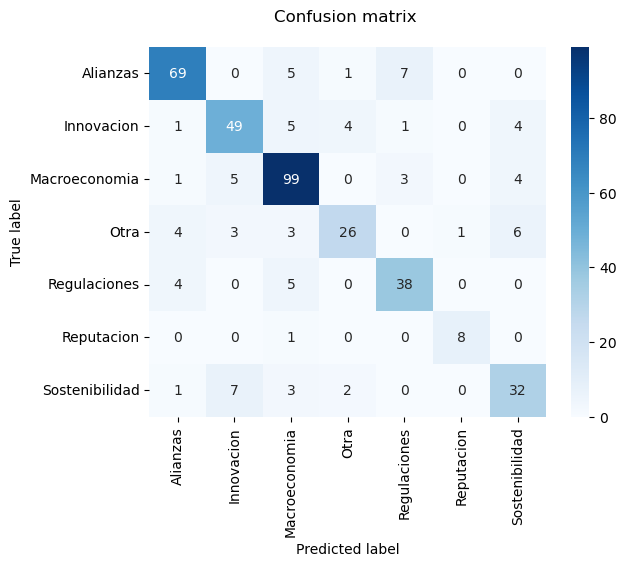

In [65]:
# EJECUTAR ESTE BLOQUE
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.metrics import confusion_matrix
from sklearn.utils.multiclass import unique_labels

# Compute confusion matrix. By default is not normalized (normalize=None)
# If necessary change 'y_pred' according to your variable name
cm = confusion_matrix(y_test, y_pred)

# Only use the labels that appear in the data
classes = unique_labels(y_test, y_pred)

df = pd.DataFrame(cm, index=classes, columns=classes)

g = sns.heatmap(df, annot=True, cmap="Blues")
g.set_yticklabels(g.get_yticklabels(), rotation=0)

plt.title('Confusion matrix \n')
plt.xlabel('Predicted label')
plt.ylabel('True label')

plt.autoscale()


**Respuesta:**  
  
Las columnas son las predicciones y las filas las respuestas correctas. Por ejemplo: el modelo predijo 7 veces Innovación cuando lo verdadero era Sostenibilidad, y 5 veces macroeconomía cuando era Alianza. Esto significa que la diagonal son las predicciones corrctas. Se puede apreciar como el modelo, si bien no perfecto, acierta bastante a la clasificación.


### Pregunta 7

Para este clasificador utilizaremos Cross-validation. Con cross-validation, el conjunto de entrenamiento se divide en $k$ conjuntos disjuntos; se entrena sobre los datos correspondientes a $k-1$ de éstos, y se evalúa sobre el conjunto restante. Esto se repite $k$ veces, evaluando siempre sobre un conjunto distinto. Teniendo en cuenta el parámetro $k$, a éste método se le llama $k$-fold cross-validation.

El código que está a continuación realizará 10-fold cross-validation usando Decision Tree sobre los datos. La forma de estimar el rendimiento del clasificador es, entre otras cosas, calculando el promedio de todos los k-folds.

Además se muestra la predición sobre los datos para testear.


In [ ]:
# EJECUTAR ESTE BLOQUE

from sklearn.model_selection import cross_validate
import numpy as np

scoring = ['precision_macro', 'recall_macro', 'accuracy', 'f1_macro']
cv_results = cross_validate(
    clf, X, y, cv=10, scoring=scoring, return_train_score=True)

print('Promedio Precision:', np.mean(cv_results['test_precision_macro']))
print('Promedio Recall:', np.mean(cv_results['test_recall_macro']))
print('Promedio F1-score:', np.mean(cv_results['test_f1_macro']))
print('Promedio Accucary:', np.mean(cv_results['test_accuracy']))

# Si quisieramos mostrar el resultado de cada k-fold, deberiamos quitar la
# funcion np.mean la cual retorna el promedio. Esto mostraría una lista con el resultado de cada fold


- Compare los valores de las métricas con respecto a lo obtenido en la pregunta 5. Comente en qué difieren y por qué.
- ¿Qué beneficios tiene emplear cross-validation?



**Respuesta:**
